# ME460 Linkages - Prof. Mark Ganter

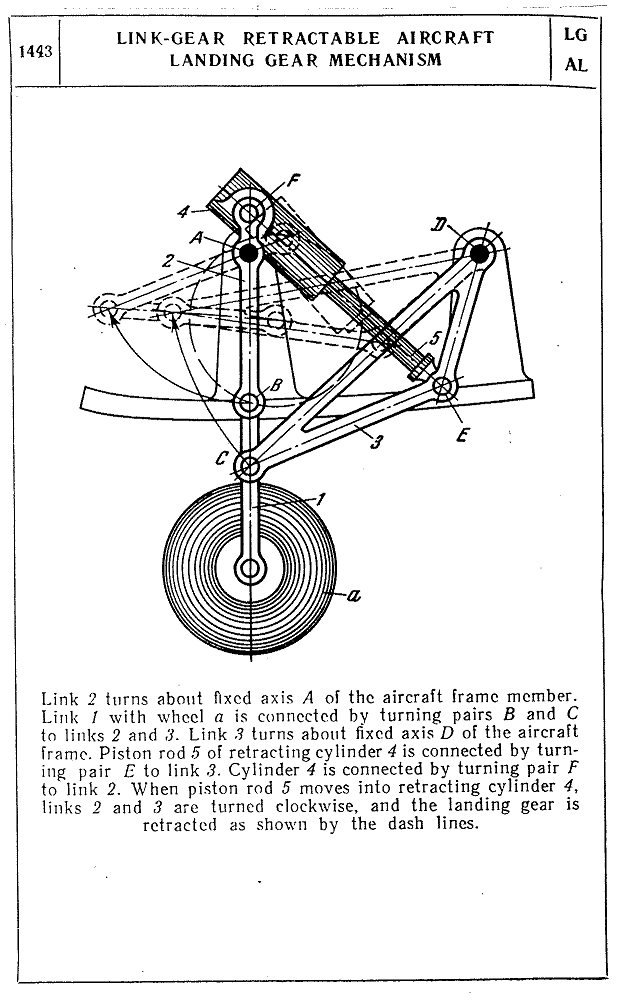

# example linkage problem (Art #1443) using python

## solve for a single position

In [4]:
from math import *
from sympy import *


#set up all the variables and vectors
t2 = radians(201)
t3, t4, l6, t6 = symbols("t3 t4 l6 t6", real=True)
r1 = 39*exp(I*0)
r2 = 25.5*exp(I*t2)
r3 = 11*exp(I*t3)
r4 = 53*exp(I*t4)
r5 = 23*exp(I*(t4+radians(35)))
r6 = l6*exp(I*t6)
r7 = 7*exp(I*(t2+radians(180)))
r8 = 17.5*exp(I*t3)

#write out the equation for linkage (looks just like what we put on the board)
eq1 = r2+r3-r4-r1
eq2 = r7-r1-r5-r6
print("eq1=",eq1)
print("eq2=",eq2)
print()

#write out the equation for couple point
plotpt = r2+r3+r8

# compute numerical solution.  Remember to set the initial guess for unknowns
ans = nsolve((re(eq1),im(eq1),re(eq2),im(eq2)), (t3, t4, l6, t6), (radians(270),radians(220),44 ,radians(139)), 
             maxsteps=100, verbose=false, tol=0.002, verify=true, solver='anewton')

print("t3:",degrees(ans[0]),"t4:",degrees(ans[1]),"l6:",ans[2],"t6:",degrees(ans[3]))
print()

print ('eq1=',eq1.evalf(subs={t3:ans[0],t4:ans[1],l6:ans[2],t6:ans[3]})," abs(eq1)=",abs(eq1.evalf(subs={t3:ans[0],t4:ans[1],l6:ans[2],t6:ans[3]}) ))
print ('eq2=',eq2.evalf(subs={t3:ans[0],t4:ans[1],l6:ans[2],t6:ans[3]})," abs(eq2)=",abs(eq2.evalf(subs={t3:ans[0],t4:ans[1],l6:ans[2],t6:ans[3]}) ))
print()
print("pt=",plotpt.evalf(subs={t3:ans[0],t4:ans[1],l6:ans[2],t6:ans[3]}))

eq1= 11*exp(I*t3) - 53*exp(I*t4) - 39 + 25.5*exp(3.5081117965086*I)
eq2= -l6*exp(I*t6) - 23*exp(I*(t4 + 0.610865238198015)) - 39 + 7*exp(6.6497044500984*I)

t3: 351.9014727128099 t4: 191.63457901728245 l6: 25.4504465380259 t6: 130.92472609503076

eq1= -0.00495379830907057 + 0.000444656907334749*I  abs(eq1)= 0.00497371465327384
eq2= -0.000266456462016587 - 0.00028794377222139*I  abs(eq2)= 0.000392314493884027

pt= 4.40947657783752 - 13.1533425754273*I


## now lets compute multiple position solutions and plot the couple point
## by iterating the input angle 0->360 degrees by a set number of degrees (eg. 5)

eq1= 25.5*exp(I*t2) + 11*exp(I*t3) - 53*exp(I*t4) - 39
eq2= -l6*exp(I*t6) + 7*exp(I*(t2 + 3.14159265358979)) - 23*exp(I*(t4 + 0.610865238198015)) - 39



<IPython.core.display.Javascript object>


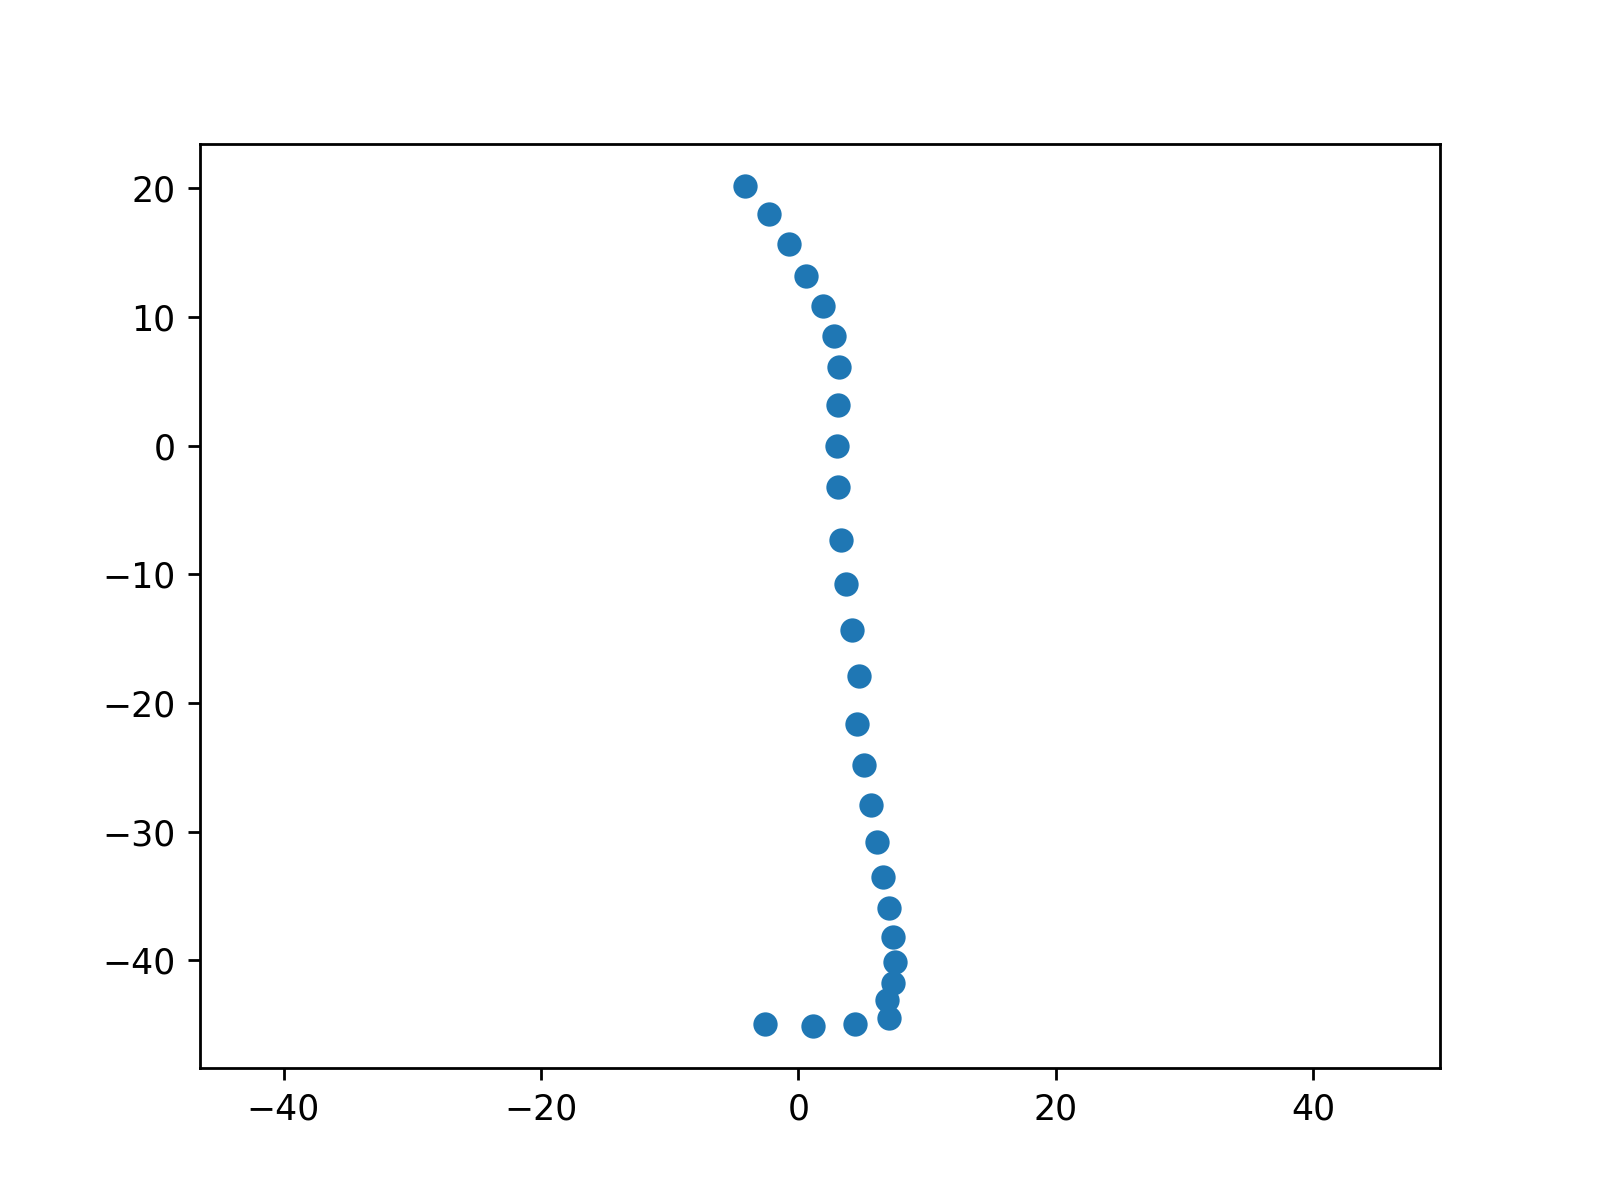

In [32]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

#set up all the variables and vectors
#this time t2 needs to symbolic too
t2, t3, t4, l6,  t6 = symbols("t2 t3 t4 l6 t6", real=True)
r1 = 39*exp(I*0)
r2 = 25.5*exp(I*t2)
r3 = 11*exp(I*t3)
r4 = 53*exp(I*t4)
r5 = 23*exp(I*(t4+radians(35)))
r6 = l6*exp(I*t6)
r7 = 7*exp(I*(t2+radians(180)))
r8 = 17.5*exp(I*t3)

#write out the equation for linkage (looks just like what we put on the board)
eq1 = r2+r3-r4-r1
eq2 = r7-r1-r5-r6
print("eq1=",eq1)
print("eq2=",eq2)
print()

#write out the equation for couple point
plotpt = r2+r3+r8

# loop through input angle from 140-> 280 by 5 degrees (can't go finer than 1 degree or you must change arrays)
# create a couple of arrays big enough to hold points for plotting (this is dirty code. why?)
xpoint = np.zeros(360)
ypoint = np.zeros(360)

index = 0
for i in range(140,280,5):
    # compute loop eq with t2 substituted 
    eq1s = eq1.subs(t2,radians(i))
    eq2s = eq2.subs(t2,radians(i))
    ans = nsolve((re(eq1s),im(eq1s),re(eq2s),im(eq2s)), (t3, t4, l6, t6), 
                 (radians(270),radians(220),44 ,radians(139)), 
                 maxsteps=100, verbose=false, prec=20, tol=0.02, verify=false, solver='anewton')
    
    # need to substitute numerical values for symbolic values for couple point
    xpoint[index] = re(plotpt.subs(t3,ans[0]).subs(t2,radians(i)))
    ypoint[index] = im(plotpt.subs(t3,ans[1]).subs(t2,radians(i)))
    index = index+1

# call matplotlib routines for a scatter plot
fig, ax = plt.subplots()
ax.scatter(xpoint[:index], ypoint[:index])
ax.set_aspect('equal',adjustable='datalim')
plt.show()

## now lets compute multiple position solutions and plot the couple point
## by randomly picking the input angle 

eq1= 25.5*exp(I*t2) + 11*exp(I*t3) - 53*exp(I*t4) - 39
eq2= -l6*exp(I*t6) + 7*exp(I*(t2 + 3.14159265358979)) - 23*exp(I*(t4 + 0.610865238198015)) - 39


<IPython.core.display.Javascript object>


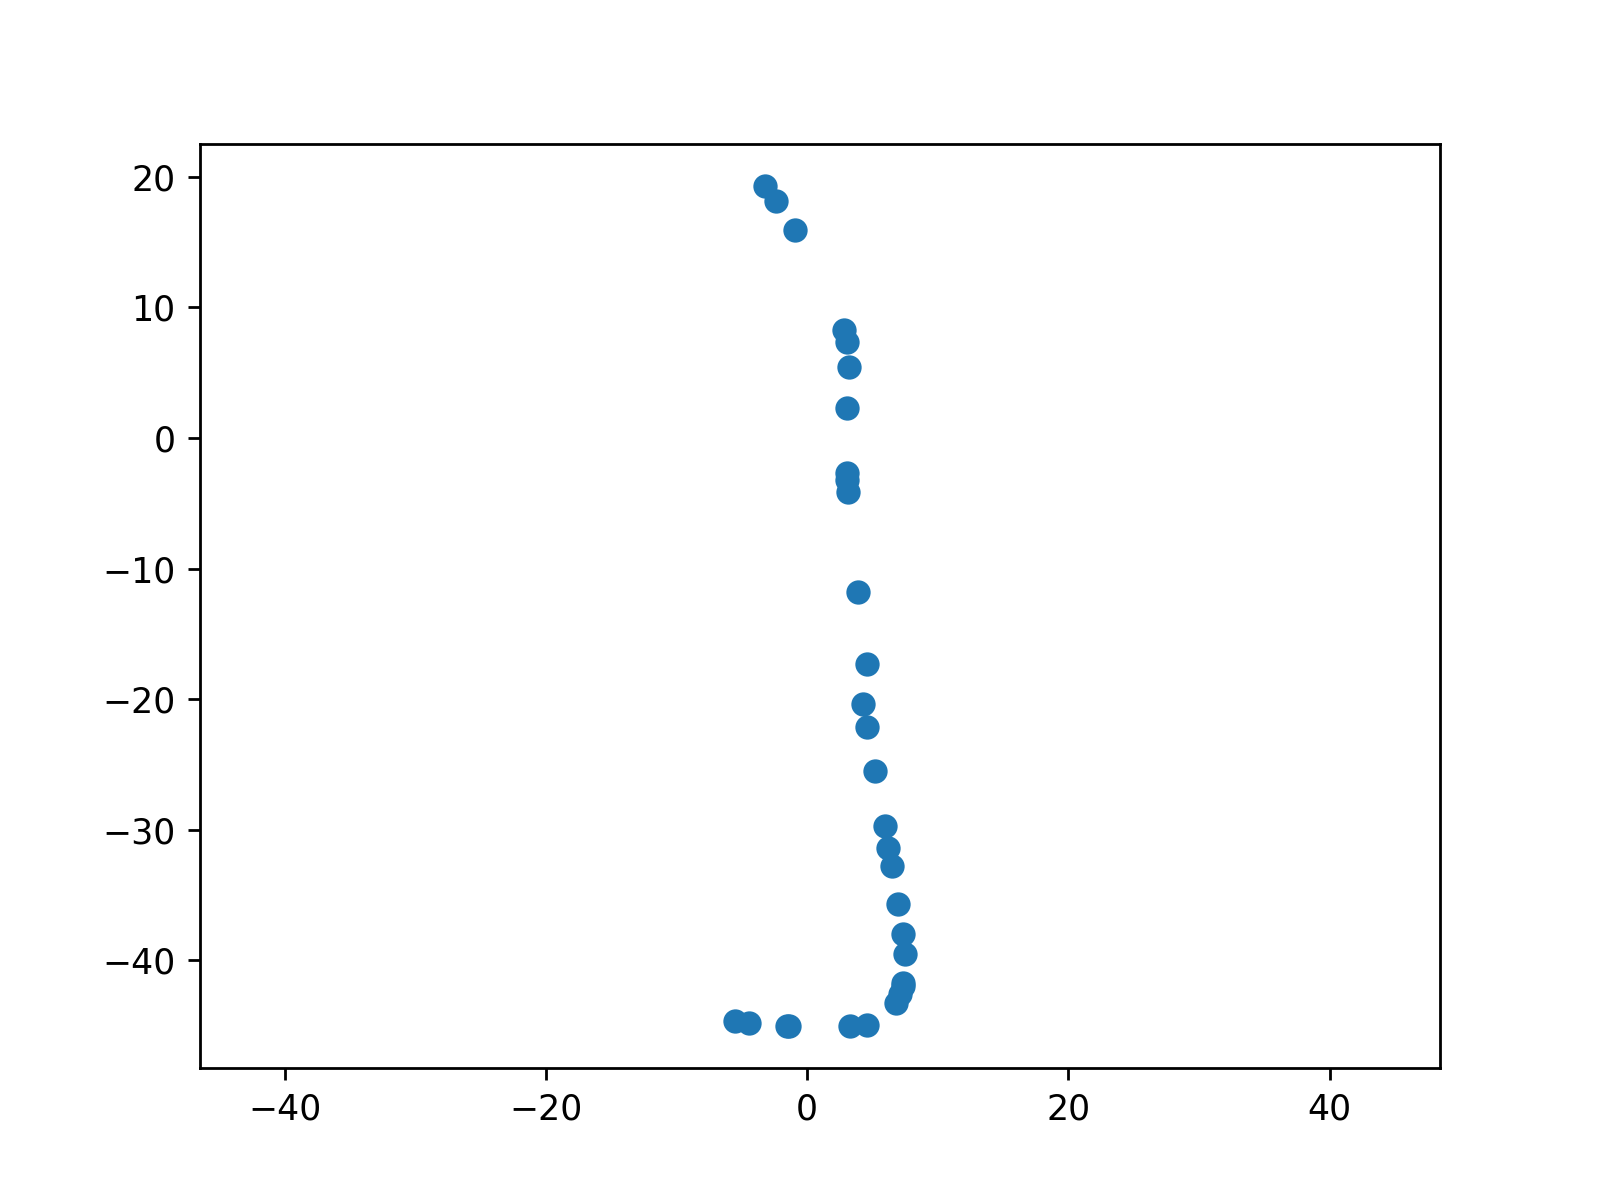

In [35]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt

#set up all the variables and vectors
#this time t2 needs to symbolic too
t2, t3, t4 = symbols("t2 t3 t4", real=True)
r1 = 39*exp(I*0)
r2 = 25.5*exp(I*t2)
r3 = 11*exp(I*t3)
r4 = 53*exp(I*t4)
r5 = 23*exp(I*(t4+radians(35)))
r6 = l6*exp(I*t6)
r7 = 7*exp(I*(t2+radians(180)))
r8 = 17.5*exp(I*t3)

#write out the equation for linkage (looks just like what we put on the board)
eq1 = r2+r3-r4-r1
eq2 = r7-r1-r5-r6
print("eq1=",eq1)
print("eq2=",eq2)

#write out the equation for couple point
plotpt = r2+r3+r8

# create a couple of arrays big enough to hold points for plotting
npoints = 100
xpoint = np.zeros(npoints)
ypoint = np.zeros(npoints)

index = 0
for i in range(npoints):

    # compute loop eq with t2 substituted 
    t2rand = 2*np.pi*random.random()
    if (t2rand > radians(140)) & (t2rand < radians(280)):
        eq1s = eq1.subs(t2,t2rand)
        eq2s = eq2.subs(t2,t2rand)
        ans = nsolve((re(eq1s),im(eq1s),re(eq2s),im(eq2s)), (t3, t4, l6, t6), 
                     (radians(270),radians(220),44 ,radians(139)), 
                     maxsteps=100, verbose=false, prec=20, tol=0.02, verify=false)
    
        # need to substitute numerical values for symbolic values for couple point
        xpoint[index] = re(plotpt.subs(t3,ans[0]).subs(t2,t2rand))
        ypoint[index] = im(plotpt.subs(t3,ans[1]).subs(t2,t2rand))
        index = index + 1
    
# call matplotlib routines for a scatter plot 
fig, ax = plt.subplots()
ax.scatter(xpoint[:index], ypoint[:index])
ax.set_aspect('equal', 'datalim')
plt.show()